<a href="https://colab.research.google.com/github/seuha516/MachineLearning_Practice/blob/main/BreamAndSmelt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **도미**와 **빙어** 구분하기!

## *Data*

In [147]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data=[[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target=[0]*35+[1]*14

## *Train set, Test set (1)*

In [92]:
train_input=fish_data[:35]
train_target=fish_target[:35]
test_input=fish_data[35:]
test_target=fish_target[35:]

In [93]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)

# 샘플링 편향
kn.fit(train_input,train_target)
kn.score(test_input,test_target) 

0.0

## *Train set, Test set (2)*

### Numpy

In [94]:
import numpy as np

input_arr=np.array(fish_data)
target_arr=np.array(fish_target)

In [95]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [96]:
print(target_arr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [97]:
print(input_arr.shape)

(49, 2)


In [98]:
np.random.seed(42)
index=np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


### New Data Set

In [99]:
train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]
test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

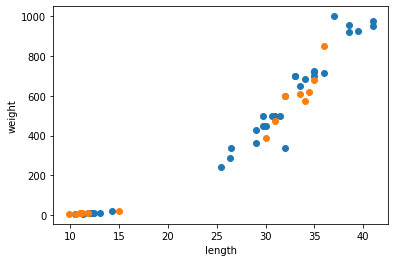

In [100]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [101]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [102]:
print(kn.predict(test_input))
print(test_target)

[1 1 0 1 0 0 0 1 0 0 1 0 0 1]
[1 1 0 1 0 0 0 1 0 0 1 0 0 1]


## *Use Data Preprocessing*

### Numpy

In [148]:
fish_data=np.column_stack((fish_length,fish_weight))
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [149]:
fish_target=np.concatenate((np.zeros(35),(np.ones(14))))
print(fish_target)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


### Train_Test_Split

In [150]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,random_state=42)

In [151]:
print(train_input.shape,test_input.shape,train_target.shape,test_target.shape)

(36, 2) (13, 2) (36,) (13,)


In [152]:
#샘플링 편향이 나타남
print(test_target)

[0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [153]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)
print(test_target)

[0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.]


In [154]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

### New fish : Error!

In [155]:
#도미를 빙어로 예측
print(kn.predict([[25,150]]))

[1.]


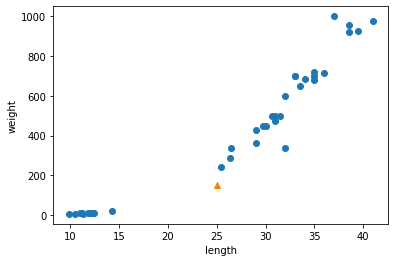

In [156]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

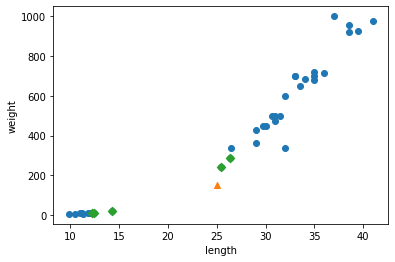

In [157]:
distances,indexes=kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [158]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 14.3  19.7]
  [ 12.4  13.4]
  [ 12.2  12.2]
  [ 26.3 290. ]]]
[[0. 1. 1. 1. 0.]]


In [159]:
print(distances)

[[ 92.00086956 130.73859415 137.17988191 138.39320793 140.00603558]]


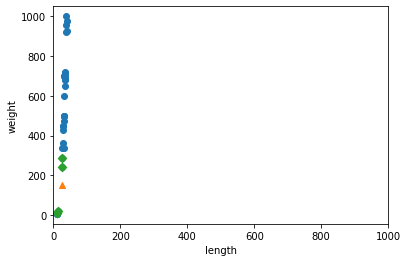

In [160]:
distances,indexes=kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### Use Standard Score

In [161]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
print(mean,std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


In [162]:
train_scaled=(train_input-mean)/std
test_scaled=(test_input-mean)/std

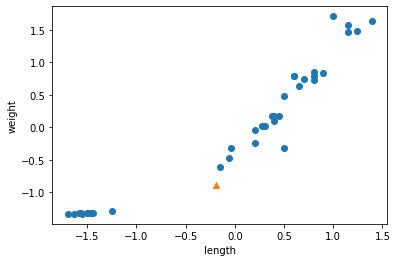

In [163]:
new=([25,150]-mean)/std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [164]:
kn.fit(train_scaled,train_target)
kn.score(test_scaled,test_target)

1.0

In [165]:
#올바른 예측
print(kn.predict([new]))

[0.]


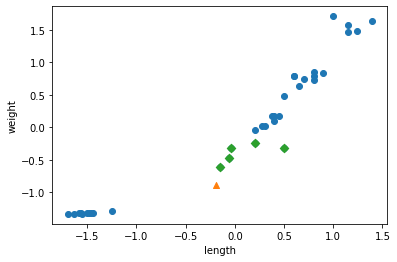

In [166]:
distances,indexes=kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()